# Week 2: exploratory data analysis

Exploring a numerical variable and its interaction with multiple variables, both numerical and categorical. 

First I created the first data file as df1 so that I can merge it with the 2nd later, like I did in week 1.

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
from scipy.stats.stats import pearsonr 

df1 = pd.read_csv('survey.csv')
df1.head()


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [2]:
df2 = pd.read_csv('steps.csv', sep=';')
df2.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.merge(df1, df2, on = 'id')
# df = df.fillna(0)
df.head()

#merging the two dataframes who both has a variable 'id', this is the common identifier

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2

Create the variable mean steps per participant. Hint: combine Pandas .loc and .mean() with the right axis argument (axis=....) for mean(). Look up the documentation of .loc and Pandas .mean() if you're unsure. 

- The head() of the resulting data frame



In [4]:
df["mean_steps"] = df.loc[:, "20-6-2013":"13-5-2014"].mean(axis=1).to_frame()
df.head(100)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Bordeaux,Female,25-34,3,5,Master or doctorate,161.0,52.0,6060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58491.067568
96,97,Bordeaux,Female,35-44,5,4,High school,162.0,67.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3964.045455
97,98,Montpellier,Male,25-34,2,2,Master or doctorate,185.0,76.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3732.305556
98,99,Lille,Female,25-34,2,2,Bachelor,163.0,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7674.601307


## Step 3

The relation of mean_steps per participant with at least 2 other numerical variables (e.g., how are steps related to weight, height).
- Scatter plot matrix including all 3 variables
- Scatter plots of your variable with the 2 other variables (2 scatter plots in total)
- Pearson’s correlation for the 2 relations
- Verbal description of the relations, including strength of the association, linearity, etc.

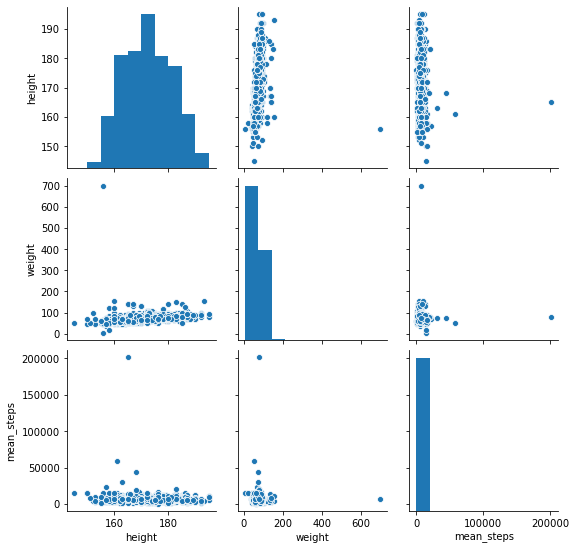

In [5]:
variables = df[["height", "weight", "mean_steps"]]
sns.pairplot(variables)
plt.show()

### Data cleaning

Need to clean some data, just like I did in the week 1 assignment. I copied that code.

In [6]:
# First doing everybody above 200 kg

df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

def above_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
        
df['weight'] = df['weight'].apply(above_200)


# Second doing everybody below 40

def below_40(x):
    if(x < 40.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40)


# Third, everybody who has an actual height.

df['height'] = df['height'].apply(pd.to_numeric, errors='coerce')


def below_100cm(x):
    if(x < 100.0): 
        return float('NaN')
    else: 
        return x
df['height'] = df['height'].apply(below_100cm)


# Fourth, and I copied this new way from the solution code. But I gotta clean the mean steps too.

df["mean_steps"].mask(df["mean_steps"].between(40000, 300000), inplace=True) 

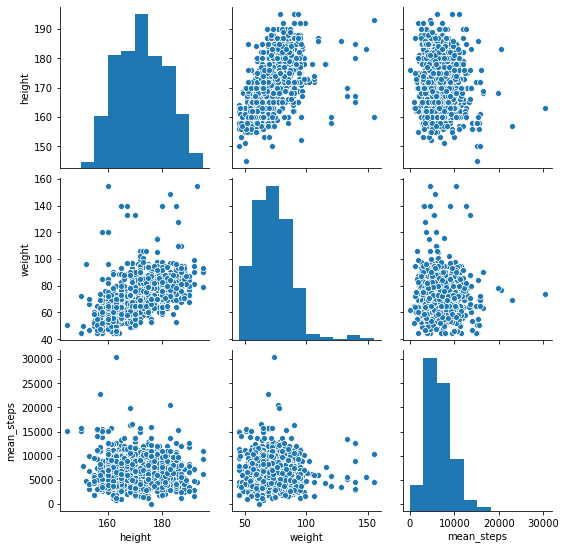

In [7]:
variables = df[["height", "weight", "mean_steps"]]
sns.pairplot(variables)
plt.show()

#### Scatter plots of your variable with the 2 other variables (2 scatter plots in total)

I choose height on the X-as so mean steps and weight come on the Y. These two plots seem the most interesting.

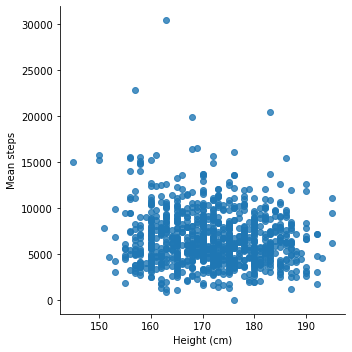

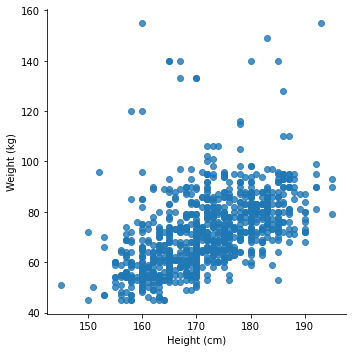

In [8]:
sns.lmplot(x='height', y='mean_steps', fit_reg=False, data=df)
plt.xlabel('Height (cm)') 
plt.ylabel('Mean steps')
plt.show()

sns.lmplot(x='height', y='weight', fit_reg=False, data=df)
plt.xlabel('Height (cm)') 
plt.ylabel('Weight (kg)')
plt.show()

#### Pearson’s correlation for the 2 relations

In [9]:
variables = variables.dropna() #drop all NA's
print(pearsonr(variables['mean_steps'], variables['height']))
print(pearsonr(variables['weight'], variables['height']))

(-0.08270499257859831, 0.012328156959859674)
(0.50842750742022, 2.6311225446873018e-61)


#### Verbal description of the relations, including strength of the association, linearity, etc.

I think this part is kind of hard. But

- Mean steps and height are not correlated (r = -0.08)
- Weight and height are medium correlated (r = 0.51)

## The relation of mean steps per participant with a categorical variable with two levels (e.g. gender, weekday vs weekend)
Graphs of the relation (e.g. histogram, violin plot, bar plot)

In [10]:
# First I count the values of the categorical variables

# City
pd.value_counts(df["city"])

Lille          505
Montpellier    153
Lyon           142
Bordeaux       129
Name: city, dtype: int64

In [11]:
# Age
pd.value_counts(df["age"])

25-34    426
35-44    178
45-54    147
<25      125
55-64     46
65+        7
Name: age, dtype: int64

In [12]:
# Gender
pd.value_counts(df["gender"])

Male      494
Female    435
Name: gender, dtype: int64

In [13]:
# Education
pd.value_counts(df["education_1"])

Master or doctorate    412
Bachelor               357
High school            106
Vocational              40
Primary                 13
No degree                1
Name: education_1, dtype: int64

### Violin plot

Text(0.5, 1.0, 'Mean steps by education level')

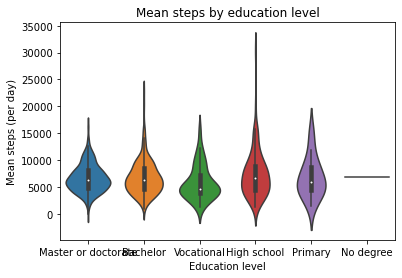

In [41]:
sns.violinplot(x=df['education_1'], y=df['mean_steps'])
plt.xlabel("Education level") 
plt.ylabel("Mean steps (per day)")
plt.title("Mean steps by education level")

### Bar plot

Text(0.5, 1.0, 'Mean steps by education level')

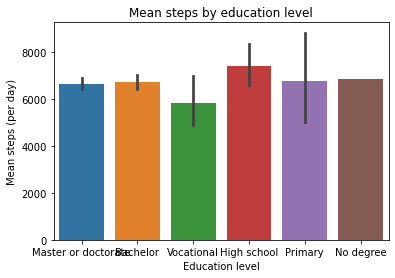

In [42]:
sns.barplot(x=df['education_1'], y=df['mean_steps'])
plt.xlabel("Education level") 
plt.ylabel("Mean steps (per day)")
plt.title("Mean steps by education level")

Conclusion: The High Schoolers walk the most!

## The relation between two categorical variables
- Graphs of the relation (e.g., bar plot)
- Cross table with relevant percentages
- Verbal description of the relation

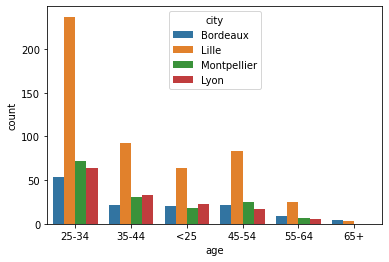

In [46]:
sns.countplot(x=df["age"], hue=df["city"], data=df)
plt.show()

In [32]:
pd.crosstab(df["age"], df["city"], margins=True)

city,Bordeaux,Lille,Lyon,Montpellier,All
age,,,,,
25-34,53,237,64,72,426
35-44,21,93,33,31,178
45-54,22,83,17,25,147
55-64,9,25,5,7,46
65+,4,3,0,0,7
<25,20,64,23,18,125
All,129,505,142,153,929


In [34]:
pd.crosstab(df["age"],df["city"], normalize="columns")


city,Bordeaux,Lille,Lyon,Montpellier
age,,,,
25-34,0.410853,0.469307,0.450704,0.470588
35-44,0.162791,0.184158,0.232394,0.202614
45-54,0.170543,0.164356,0.119718,0.163399
55-64,0.069767,0.049505,0.035211,0.045752
65+,0.031008,0.005941,0.000000,0.000000
<25,0.155039,0.126733,0.161972,0.117647


I can't really conclude something here I think. Most people are from Lille I guess.